# Problem 3.1

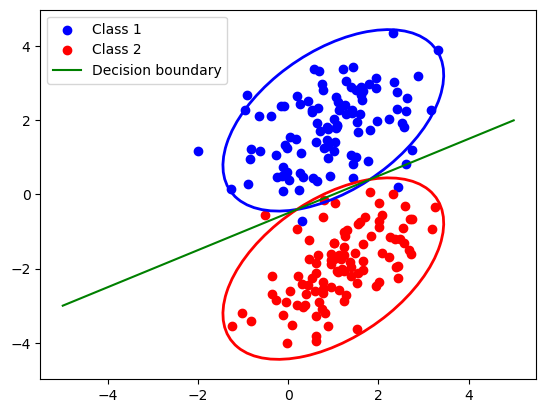

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

np.random.seed(123)
# Define the mean vectors and covariance matrix
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
sigma = np.array([[1, 0.5], [0.5, 1]])

# Sample data points from the two Gaussian distributions
n = 100
X1 = np.random.multivariate_normal(mu1, sigma, n)
X2 = np.random.multivariate_normal(mu2, sigma, n)

# Compute the coefficients of the linear discriminant function
w = np.linalg.inv(sigma).dot(mu1 - mu2)
w0 = -0.5 * (mu1.dot(np.linalg.inv(sigma)).dot(mu1) - mu2.dot(np.linalg.inv(sigma)).dot(mu2))

# Define the decision boundary
x = np.linspace(-5, 5, 100)
y = - (w[0] * x + w0) / w[1]

# Define the confidence level
conf_level = 0.95

# Compute the eigenvalues and eigenvectors of the covariance matrix for each class
eigenvalues1, eigenvectors1 = np.linalg.eig(sigma)
eigenvalues2, eigenvectors2 = np.linalg.eig(sigma)

# Compute the radius of the confidence ellipses for each class
rad1 = np.sqrt(eigenvalues1) * np.sqrt(-2 * np.log(1 - conf_level))
rad2 = np.sqrt(eigenvalues2) * np.sqrt(-2 * np.log(1 - conf_level))

# Plot the data points and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], color='red', label='Class 2')
ax.plot(x, y, color='green', label='Decision boundary')

# Plot the confidence ellipses for each class
ellipse1 = Ellipse(xy=mu1, width=rad1[0]*2, height=rad1[1]*2, angle=np.rad2deg(np.arccos(eigenvectors1[0, 0])),edgecolor='b', fc='None', lw=2)
ellipse2 = Ellipse(xy=mu2, width=rad2[0]*2, height=rad2[1]*2, angle=np.rad2deg(np.arccos(eigenvectors2[0, 0])),edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)

plt.legend()
plt.show()


# Problem 3.2


Mean point: [0.94831187 1.82501638] [ 1.17017825 -1.90605149]
[ 1.17017825 -1.90605149] [0.94831187 1.82501638]
[ 0.22186639 -3.73106787]
Slope:, -16.816733221622908
intercept: 17.77252403130992


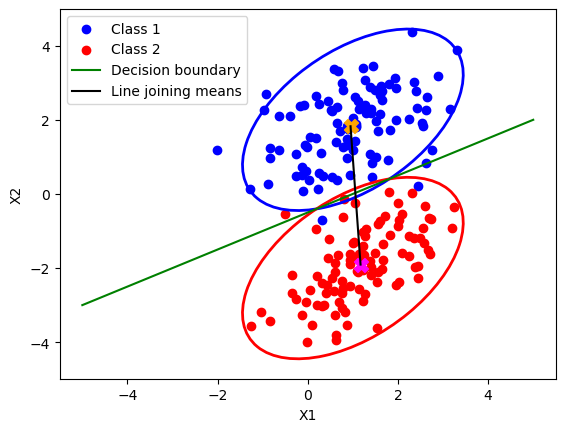

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(123)

# class 1 parameters
mu1 = np.array([1, 2])
sigma = np.array([[1, 0.5], [0.5, 1]])
n1 = 100  # number of samples from class 1

# class 2 parameters
mu2 = np.array([1, -2])
n2 = 100  # number of samples from class 2

# generate random samples from class 1
x1 = np.random.multivariate_normal(mu1, sigma, size=n1)
y1 = np.ones(n1)

# generate random samples from class 2
x2 = np.random.multivariate_normal(mu2, sigma, size=n2)
y2 = 2 * np.ones(n2)

# changing variable for decision boundary
d_x = x
d_y = y

# combine data
x = np.vstack((x1, x2))
y = np.concatenate((y1, y2))

# compute the mean point/Centroids of the dataset
m1= np.mean(x1, axis=0)
m2= np.mean(x2, axis=0)
print('Mean point:', m1, m2)
centroids = np.array([m1, m2])

# compute pooled covariance matrix
S = (n1 - 1) * np.cov(x1.T) + (n2 - 1) * np.cov(x2.T)
Sp = (n1 * np.outer(centroids[0] - np.mean(x, axis=0), centroids[0] - np.mean(x, axis=0)) + 
      n2 * np.outer(centroids[1] - np.mean(x, axis=0), centroids[1] - np.mean(x, axis=0))) / (n1 + n2 - 2)
Sw = S - Sp

# perform LDA and project data onto direction of greatest centroid spread
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
w = lda.scalings_[:, 0]
x_lda = x.dot(w)

# extract LDA coefficients
w = lda.coef_.squeeze()

# compute intercept of decision boundary
b_lda = -lda.intercept_ / w[0]

# create dataframe for ggplot
df = pd.DataFrame({'z': x_lda.squeeze(), 'y': y})

# plot the data points
fig, ax = plt.subplots()
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class 2')
ax.plot(d_x, d_y, color='green', label='Decision boundary')

# find the line that joins to 2 class means
print(m2,m1)
# To find the line that join the 2 class means, we can use the slope-intercept form to find the equation of the line from 2 points. 
sub = np.subtract(m2,m1)
print(sub)
m = sub[1]/sub[0]
print("Slope:,",m)
b = -(m * m1[0]) + m1[1]
print("intercept:",b)

# Plot the line that joins the 2 class means
x_values = np.array([np.min([m1[0], m2[0]]), np.max([m1[0], m2[0]])])
y_values = m * x_values + b
plt.plot(x_values, y_values, linestyle='solid', color='black', label='Line joining means')

# plot the mean point of each class
plt.scatter(m1[0],m1[1],color='orange',s=100,marker="X")
plt.scatter(m2[0],m2[1],color='magenta',s=100,marker="X")
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

# Plot the confidence ellipses for each class
ellipse1 = Ellipse(xy=mu1, width=rad1[0]*2, height=rad1[1]*2, angle=np.rad2deg(np.arccos(eigenvectors1[0, 0])),edgecolor='b', fc='None', lw=2)
ellipse2 = Ellipse(xy=mu2, width=rad2[0]*2, height=rad2[1]*2, angle=np.rad2deg(np.arccos(eigenvectors2[0, 0])),edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)

plt.show()


Weights: [ 0.22186639 -3.73106787]
[ 0.22186639 -3.73106787]
Slope:, -16.816733221622908
intercept: 17.77252403130992


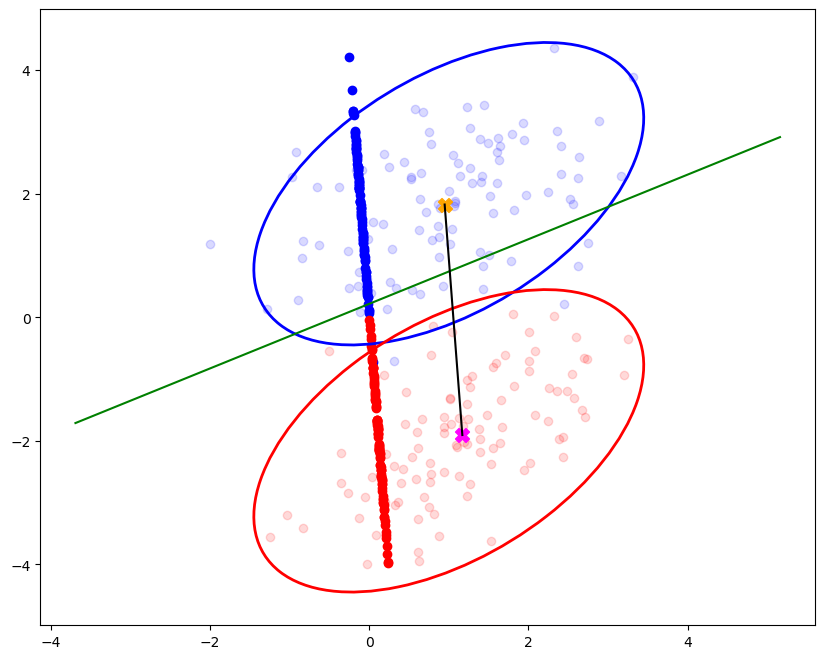

In [3]:
import numpy as np
W =np.subtract(m2,m1)
print("Weights:",W)

fig, ax = plt.subplots(figsize=(10,8))
# plot data and decision boundary
plt.plot(np.linspace(df['z'].min(), df['z'].max()), -w[0] / w[1] * np.linspace(df['z'].min(), df['z'].max()) - b_lda / w[1], color='green')

colors=['blue','red']

# implementing LDA 
for point,pred in zip(x, y):
  ax.scatter(point[0],point[1],color=colors[int(pred)-1], alpha=0.15)
  proj = np.dot(point,W)/np.dot(W,W) * W
  ax.scatter(proj[0],proj[1],color=colors[int(pred)-1])

# plot the mean point of each class
ax.scatter(m1[0],m1[1],color='orange',s=100,marker="X")
ax.scatter(m2[0],m2[1],color='magenta',s=100,marker="X")

# To find the line that join the 2 class means, we can use the slope-intercept form to find the equation of the line from 2 points. 
sub = np.subtract(m2,m1)
print(sub)
m = sub[1]/sub[0]
print("Slope:,",m)
b = -(m * m1[0]) + m1[1]
print("intercept:",b)

# Plot the confidence ellipses for each class
ellipse1 = Ellipse(xy=mu1, width=rad1[0]*2, height=rad1[1]*2, angle=np.rad2deg(np.arccos(eigenvectors1[0, 0])),edgecolor='b', fc='None', lw=2)
ellipse2 = Ellipse(xy=mu2, width=rad2[0]*2, height=rad2[1]*2, angle=np.rad2deg(np.arccos(eigenvectors2[0, 0])),edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)

# Plot the line that joins the 2 class means
x_values = np.array([np.min([m1[0], m2[0]]), np.max([m1[0], m2[0]])])
y_values = m * x_values + b
plt.plot(x_values, y_values, linestyle='solid', color='black', label='Line joining means')
    
plt.show()

# Problem 3.3

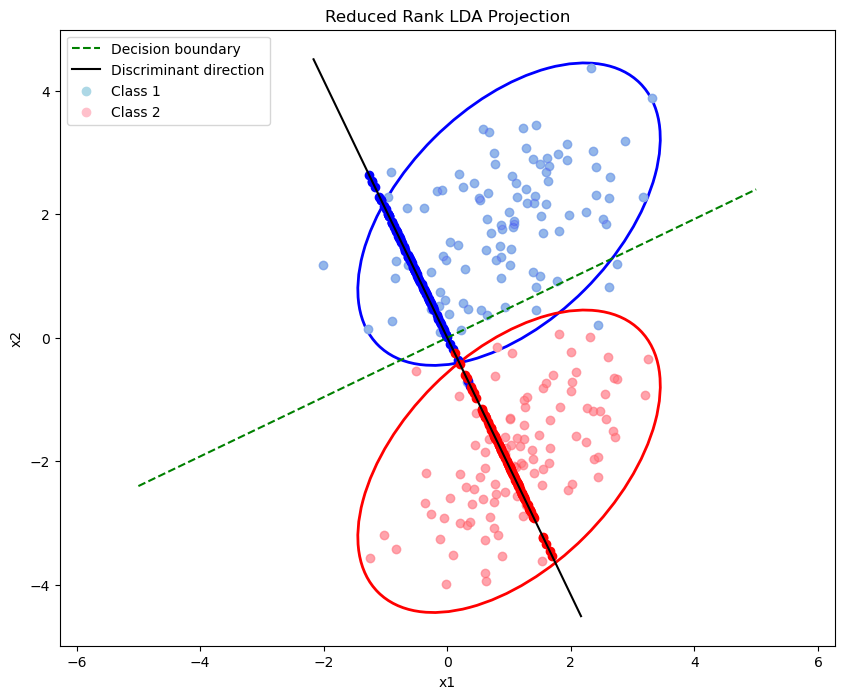

In [4]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Define parameters
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
Sigma = np.array([[1, 0.5], [0.5, 1]])

# Generate data
np.random.seed(123)
n1 = 100
n2 = 100
X1 = np.random.multivariate_normal(mu1, Sigma, n1)
X2 = np.random.multivariate_normal(mu2, Sigma, n2)
X = np.vstack((X1, X2))
y = np.concatenate((np.ones(n1), -np.ones(n2)))

# Reduced rank LDA
Sw = (n1 - 1) * np.cov(X1.T) + (n2 - 1) * np.cov(X2.T)
Sb = np.outer(mu1 - mu2, mu1 - mu2)
evals, evecs = eig(np.linalg.inv(Sw) @ Sb)
w = evecs[:, np.argmax(evals)]
X_lda = X @ w

# Compute decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -w[0]/w[1] * x1
boundary = np.vstack((x1, x2)).T

fig, ax = plt.subplots(figsize=(10,8))

# Plot the confidence ellipses for each class
ellipse1 = Ellipse(xy=mu1, width=rad1[0]*2, height=rad1[1]*2, angle=np.rad2deg(np.arccos(eigenvectors1[0, 0])),edgecolor='b', fc='None', lw=2)
ellipse2 = Ellipse(xy=mu2, width=rad2[0]*2, height=rad2[1]*2, angle=np.rad2deg(np.arccos(eigenvectors2[0, 0])),edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)

#plot decision boundary
plt.plot(boundary[:,0], boundary[:,1], 'g--', label='Decision boundary')

# Plot discriminant direction
plt.plot([-5*w[0], 5*w[0]], [-5*w[1], 5*w[1]], 'k-', label='Discriminant direction')
plt.scatter(X1[:, 0], X1[:, 1], c='lightblue', marker='o', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], c='pink', marker='o', label='Class 2')
plt.axis('equal')
plt.legend(loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Reduced Rank LDA Projection')

# Plot data and projected points
colors=['blue','red','green']
for point,pred in zip(X, y):
    plt.scatter(point[0], point[1], c=colors[int(pred)-1], alpha=0.15)
    proj = np.dot(point, w)/np.dot(w, w) * w
    plt.scatter(proj[0], proj[1], c=colors[int(pred)-1])

plt.show()


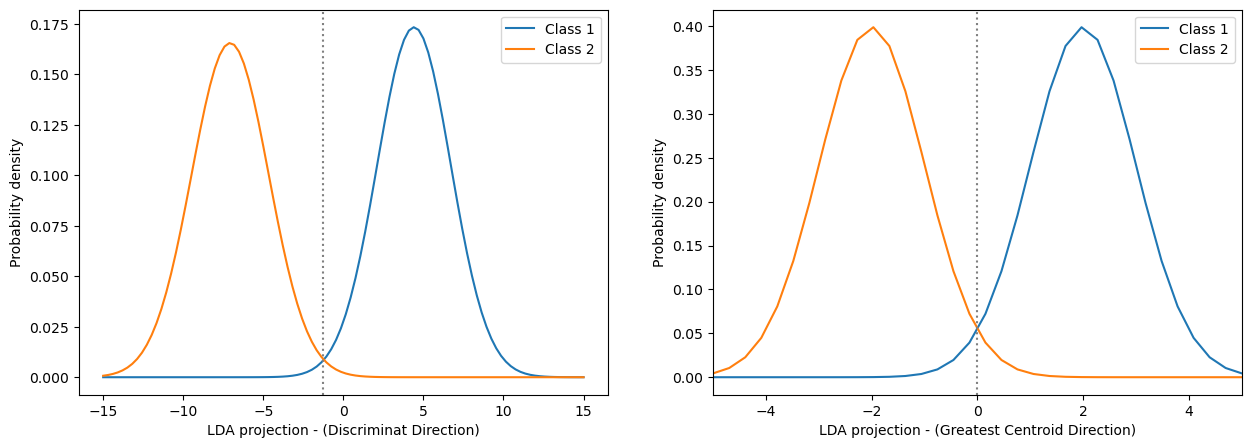

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Set seed for reproducibility
np.random.seed(42)

# Set parameters for the problem
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generate data points for each class
n_samples = 100
X1 = np.random.multivariate_normal(mu1, cov, size=n_samples)
X2 = np.random.multivariate_normal(mu2, cov, size=n_samples)

# Compute the LDA projection vector
Sw = np.cov(X1.T) + np.cov(X2.T)
w = np.linalg.inv(Sw).dot(mu1 - mu2)

# Project the data onto the LDA projection vector
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

# Compute the means and variances of the projected data for each class
mu1_proj = np.mean(X1_proj)
mu2_proj = np.mean(X2_proj)
var1_proj = np.var(X1_proj)
var2_proj = np.var(X2_proj)

# Compute the decision boundary
db = (mu1_proj + mu2_proj) / 2

width = 15
# Define x values for plotting probability density functions
x_proj = np.linspace(-width, width, 100)
x_orig = np.linspace(-width, width, 100)

# Compute probability density function for each class along the LDA projection vector
pdf1_proj = norm.pdf(x_proj, mu1_proj, np.sqrt(var1_proj))
pdf2_proj = norm.pdf(x_proj, mu2_proj, np.sqrt(var2_proj))

# Compute probability density function for each class along the original axis
pdf1_orig = norm.pdf(x_orig, mu1[0], np.sqrt(cov[0, 0]))
pdf2_orig = norm.pdf(x_orig, mu2[0], np.sqrt(cov[0, 0]))

# Compute probability density function for each class along the original VERTICAL axis
pdf1_verti = norm.pdf(x_orig, mu1[1], np.sqrt(cov[0, 0]))
pdf2_verti = norm.pdf(x_orig, mu2[1], np.sqrt(cov[0, 0]))

# Compute the coefficients and intercept of the decision boundary line
m = -w[0] / w[1]
c = -db / w[1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot probability density functions along the LDA projection vector
ax[0].plot(x_proj, pdf1_proj, label='Class 1')
ax[0].plot(x_proj, pdf2_proj, label='Class 2')
ax[0].legend()
ax[0].set_xlabel('LDA projection - (Discriminat Direction)')
ax[0].set_ylabel('Probability density')
ax[0].axvline(x=-1.25, color='grey', linestyle='dotted')


# Plot probability density functions along the original VERTICAL axis
ax[1].plot(x_orig, pdf1_verti, label='Class 1')
ax[1].plot(x_orig, pdf2_verti, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('LDA projection - (Greatest Centroid Direction)')
ax[1].set_ylabel('Probability density')
ax[1].set_xlim(-5, 5, 100)
ax[1].axvline(x=0, color='grey', linestyle='dotted')


# Show the plots
plt.show()